# Breast cancer Classification

## Import libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and cleaning data:

In [81]:
df = pd.read_csv('breast-cancer-wisconsin.txt')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Index                        15855 non-null  int64 
 1   ID                           15855 non-null  int64 
 2   Clump Thickness              15855 non-null  int64 
 3   Uniformity of Cell Size      15827 non-null  object
 4   Uniformity of Cell Shape     15827 non-null  object
 5   Marginal Adhesion            15827 non-null  object
 6   Single Epithelial Cell Size  15827 non-null  object
 7   Bare Nuclei                  15827 non-null  object
 8   Bland Chromatin              15827 non-null  object
 9   Normal Nucleoli              15827 non-null  object
 10  Mitoses                      15827 non-null  object
 11  Class                        15827 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


In [4]:
df['Class'].value_counts()

4          15164
2            456
40           151
?             23
No idea       17
#             11
20             5
Name: Class, dtype: int64

In [5]:
df = df[df['Class']!='No idea']
df = df[df['Class']!='?']
df = df[df['Class']!='#']
df = df[~df['Class'].isnull()]

df['Class'] = df['Class'].map({'4':0, '2':1, '40':0, '20':1})

In [7]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', 1)

In [8]:
df['Class'].value_counts()

0    15315
1      461
Name: Class, dtype: int64

In [9]:
df['ID'].value_counts()

1142706    999
378275     998
1107684    998
1226612    998
1076352    997
          ... 
1200847      1
1319609      1
709287       1
412300       1
1173509      1
Name: ID, Length: 665, dtype: int64

In [10]:
### According to docs, all values should be integers from 1 to 10

for column in df.columns:
    df[column] = df[column].astype(int)
    for value in df[column].unique():
        if value > 10:
             df[column].replace(value,value/10, inplace=True)
            

In [11]:
df = df.groupby('ID').agg(lambda x:x.value_counts().index[0])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 661 entries, 6163.4 to 1345435.2
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              661 non-null    int32
 1   Uniformity of Cell Size      661 non-null    int32
 2   Uniformity of Cell Shape     661 non-null    int32
 3   Marginal Adhesion            661 non-null    int32
 4   Single Epithelial Cell Size  661 non-null    int32
 5   Bare Nuclei                  661 non-null    int32
 6   Bland Chromatin              661 non-null    int32
 7   Normal Nucleoli              661 non-null    int32
 8   Mitoses                      661 non-null    int32
 9   Class                        661 non-null    int32
dtypes: int32(10)
memory usage: 31.0 KB


In [19]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,,,,,,,,,,
6163.4,5,4,3,1,2,1,2,3,1,1
6337.5,9,1,2,6,4,10,7,7,2,0
7638.9,10,4,7,2,2,8,6,1,1,0
9571.9,6,10,10,10,8,10,7,10,7,0
12805.9,1,1,1,1,2,5,5,1,1,1


In [20]:
df['Class'].value_counts()

1    414
0    247
Name: Class, dtype: int64

# VISUALIZING THE DATA:

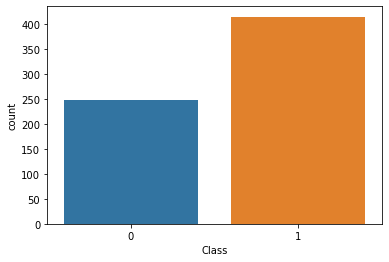

In [22]:
sns.countplot(df['Class'], label = "Count")

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


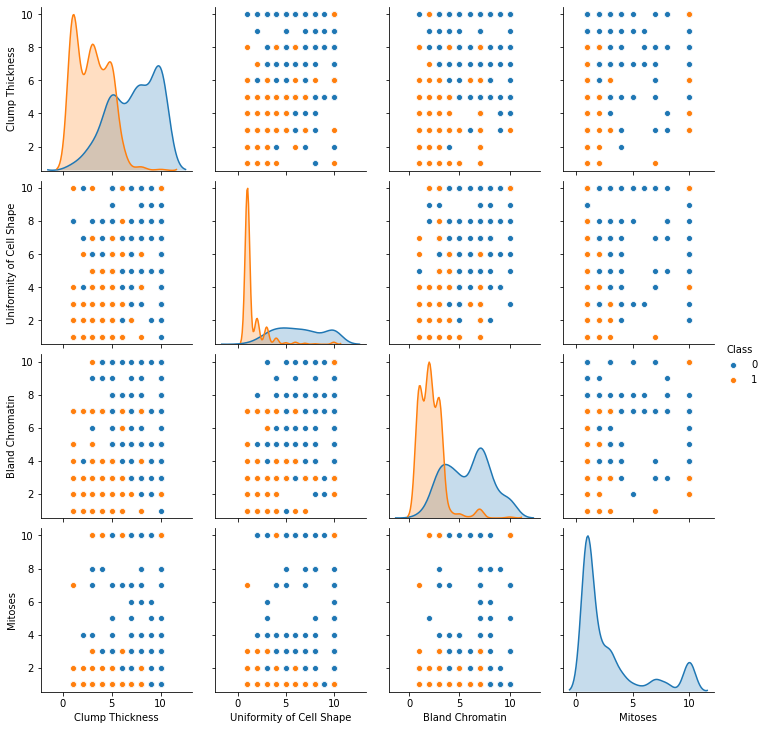

In [27]:
sns.pairplot(df, hue = 'Class', vars = ['Clump Thickness','Uniformity of Cell Shape','Bland Chromatin','Mitoses'] )

# Machine Learning Models:

In [76]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
y = df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

In [79]:
#Using KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('KNeighborsClassifier Training Accuracy:', knn.score(X_train, y_train))
#Check precision, recall, f1-score
print(classification_report(y_test, knn.predict(X_test)))

KNeighborsClassifier Training Accuracy: 0.9678030303030303
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.97      0.99      0.98        74

    accuracy                           0.98       133
   macro avg       0.98      0.98      0.98       133
weighted avg       0.98      0.98      0.98       133



In [74]:
#Using Logistic Regression 
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)
print('Logistic Regression Training Accuracy:', log.score(X_train, y_train))
#Check precision, recall, f1-score
print(classification_report(y_test, log.predict(X_test)))

Logistic Regression Training Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        46
           1       0.98      0.94      0.96        87

    accuracy                           0.95       133
   macro avg       0.94      0.95      0.94       133
weighted avg       0.95      0.95      0.95       133



In [72]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier   
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
print('Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))

#Check precision, recall, f1-score
print(classification_report(y_test, forest.predict(X_test)))


Random Forest Classifier Training Accuracy: 0.9924242424242424
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        46
           1       0.98      0.93      0.95        87

    accuracy                           0.94       133
   macro avg       0.93      0.94      0.93       133
weighted avg       0.94      0.94      0.94       133



0.9958772331653688


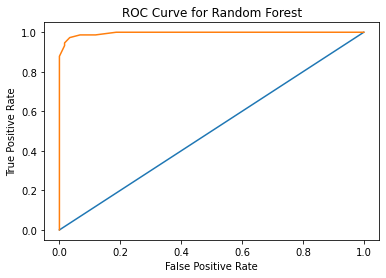

In [78]:
from sklearn import metrics
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
best_model = forest.fit(X_train, y_train)
y_pred_prob = best_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()
